In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vansh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data=pd.read_csv(r"C:\Users\Vansh\Downloads\gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation=gold_data.corr()

<AxesSubplot:>

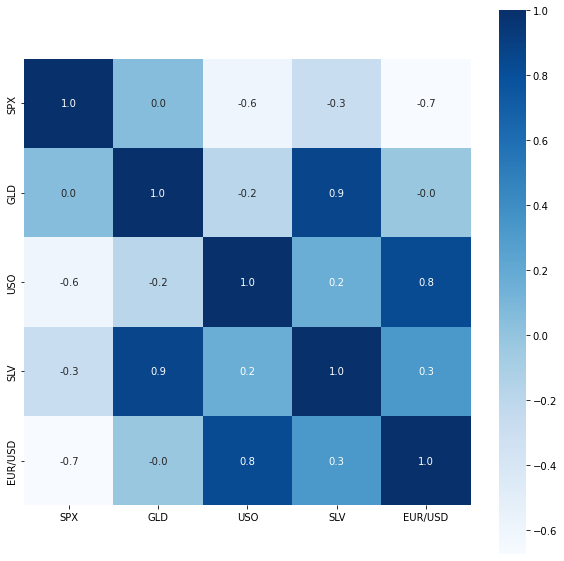

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Vansh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

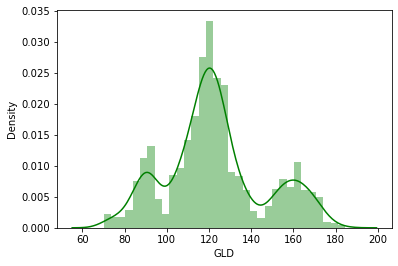

In [13]:
sns.distplot(gold_data['GLD'],color='Green')

In [14]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.2)

In [16]:
regressor=RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
test_data_prediction=regressor.predict(x_test)

In [19]:
print(test_data_prediction)

[ 84.43459942 161.47139895 130.46610028 118.89430129 118.34280099
 123.99050117 110.3220998  125.30870116 166.77900137 102.89390041
 146.27989687  91.38910153 123.96470028 104.72760086 163.04350211
 160.88259813 166.38260057 124.48240055  89.56430093 160.55660222
 126.79280114  84.2108995  117.88870073  91.84169949  90.03630045
 172.81349658 121.50980146 130.2874994  119.05319949 115.43840046
 119.73129995 157.60809999 121.92379917 127.44830045 160.55540258
 120.82729932 114.58530043  87.32249988  88.13739928 127.82120093
 126.29549943 136.62600136  89.80320162 109.06999929 108.84149946
 127.03869882 113.69340121 159.93839942 139.03049898 124.85450064
 117.36420021  93.98150115  95.95169897 114.00980005 156.28139927
 124.40329964 116.17780107 178.09699891 118.16850031  91.27389849
 121.15750056 123.56339978 117.30070097 123.55140018 107.56659795
 108.9354994  113.13210047 125.86600046 117.6951002  109.90279949
 127.99700149 157.11120258 116.04729875 120.81570117 119.75630036
  74.82320

In [20]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.9884258906280757


In [21]:
y_test=list(y_test)

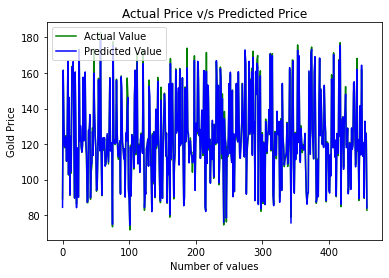

In [22]:
plt.plot(y_test,color='green',label='Actual Value')
plt.plot(test_data_prediction,color='blue',label='Predicted Value')
plt.title("Actual Price v/s Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()